<a href="https://colab.research.google.com/github/thanaphornkanking/Project/blob/main/%E0%B9%80%E0%B8%97%E0%B8%AA%E0%B9%82%E0%B8%A1%E0%B9%80%E0%B8%94%E0%B8%A5%E0%B8%81%E0%B8%B1%E0%B8%9A%E0%B8%A0%E0%B8%B2%E0%B8%9E%E0%B8%88%E0%B8%A3%E0%B8%B4%E0%B8%87(id14).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 1100, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 1100 (delta 133), reused 241 (delta 121), pack-reused 837
Receiving objects: 100% (1100/1100), 14.10 MiB | 26.10 MiB/s, done.
Resolving deltas: 100% (630/630), done.
/content/efficientnet_keras_transfer_learning


In [4]:
df = pd.read_csv (r'/content/drive/MyDrive/รูปภาพtest/id_car_test.csv')
df

,no,id,part,Path_Name
0,1,id001,p01,/content/drive/MyDrive/รูปภาพtest/id001/p01/Au...
1,2,id001,p01,/content/drive/MyDrive/รูปภาพtest/id001/p01/Ac...
2,3,id001,p01,/content/drive/MyDrive/รูปภาพtest/id001/p01/Au...
3,4,id001,p01,/content/drive/MyDrive/รูปภาพtest/id001/p01/Au...
4,5,id001,p01,/content/drive/MyDrive/รูปภาพtest/id001/p01/Au...
...,...,...,...,...
927,928,id001,p14,/content/drive/MyDrive/รูปภาพtest/id001/p14/As...
928,929,id001,p14,/content/drive/MyDrive/รูปภาพtest/id001/p14/Ac...
929,930,id001,p15,/content/drive/MyDrive/รูปภาพtest/id001/p15/Au...
930,931,id001,p15,/content/drive/MyDrive/รูปภาพtest/id001/p15/Au...


In [6]:
import sys
sys.path.append('/content/drive/MyDrive/Model/part_id14.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [7]:
#load model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Model/part_id14.h5')
height = width = model.input_shape[1]

In [8]:
import pandas as pd

test_csv_path = '/content/drive/MyDrive/รูปภาพtest/id_car_test.csv'  # Update the path to your CSV file
test = pd.read_csv(test_csv_path)

height, width = 150, 150  # Update these values according to your model's input size

test = test[test['no'].between(1, 932)]
act = test['part'].tolist()  # Actual labels
path = test['Path_Name'].tolist()  # Paths to images


In [9]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path): #สร้างฟังก์ชัน
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตาม พารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img) # model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [10]:
predict_image(path[0])[0]

1/1 [==============================] - 2s 2s/step


0.07649509

In [11]:
import numpy as np

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 16

# กำหนด train_datagen เพื่อปรับเปลี่ยนข้อมูลรูปภาพ
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [13]:
# สร้าง train_generator จาก dataframe โดยใช้ train_datagen
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory='/content/drive/MyDrive/รูปภาพtest/id001',
    x_col='Path_Name',  # ชื่อคอลัมน์ที่เก็บ paths ของรูปภาพ
    y_col='part',       # ชื่อคอลัมน์ที่เก็บ label/class
    target_size=(height, width),  # ขนาดที่ต้องการให้รูปภาพ
    batch_size=batch_size,
    class_mode='categorical'  # หรือ 'binary' หากเป็นประเภท binary classification
)

#label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 932 validated image filenames belonging to 15 classes.
{0: 'p01', 1: 'p02', 2: 'p03', 3: 'p04', 4: 'p05', 5: 'p06', 6: 'p07', 7: 'p08', 8: 'p09', 9: 'p10', 10: 'p11', 11: 'p12', 12: 'p13', 13: 'p14', 14: 'p15'}


In [14]:
# Predict
pred_list = []
prob_list = []
for img_path in path:
    predict = predict_image(img_path)
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

pred = np.array(pred_list)
act = np.array(act)

1/1 [==============================] - 0s 48ms/step


In [15]:
pred_list

['p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p01',
 'p06',
 'p02',
 'p02',
 'p02',
 'p02',
 'p09',
 'p02',
 'p02',
 'p02',
 'p02',
 'p09',
 'p09',
 'p02',
 'p01',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p15',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p01',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p09',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p01',
 'p02',
 'p02',
 'p02',
 'p02',
 'p15',
 'p01',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p09',
 'p02',
 'p01',
 'p01',
 'p02',
 'p02',
 'p02',
 'p09',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p01',
 'p02',
 'p02',
 'p02',
 'p05',
 'p02',
 'p02',
 'p02',
 'p02',
 'p02',
 'p01',
 'p02',
 'p02',
 'p01',
 'p02',
 'p02',
 'p09',
 'p02',
 'p01',
 'p02',
 'p02',
 'p09',
 'p02',
 'p02',
 'p02',
 'p02',
 'p01',


In [16]:
pred = np.array(pred_list)
act = np.array(act)

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 8.583690987124463%
              precision    recall  f1-score   support

         p01       0.10      0.10      0.10       199
         p02       0.00      0.25      0.00         4
         p03       0.00      0.00      0.00       160
         p04       0.00      0.00      0.00        79
         p05       0.73      0.49      0.58       111
         p06       0.06      0.04      0.05        27
         p07       0.00      0.00      0.00        14
         p08       0.00      0.00      0.00        13
         p09       0.02      0.21      0.03        14
         p10       0.00      0.00      0.00        10
         p11       0.00      0.00      0.00       153
         p12       0.00      0.00      0.00        43
         p13       0.00      0.00      0.00        96
         p14       0.00      0.00      0.00         6
         p15       0.12      0.67      0.21         3

    accuracy                           0.09       932
   macro avg       0.07      0.12      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

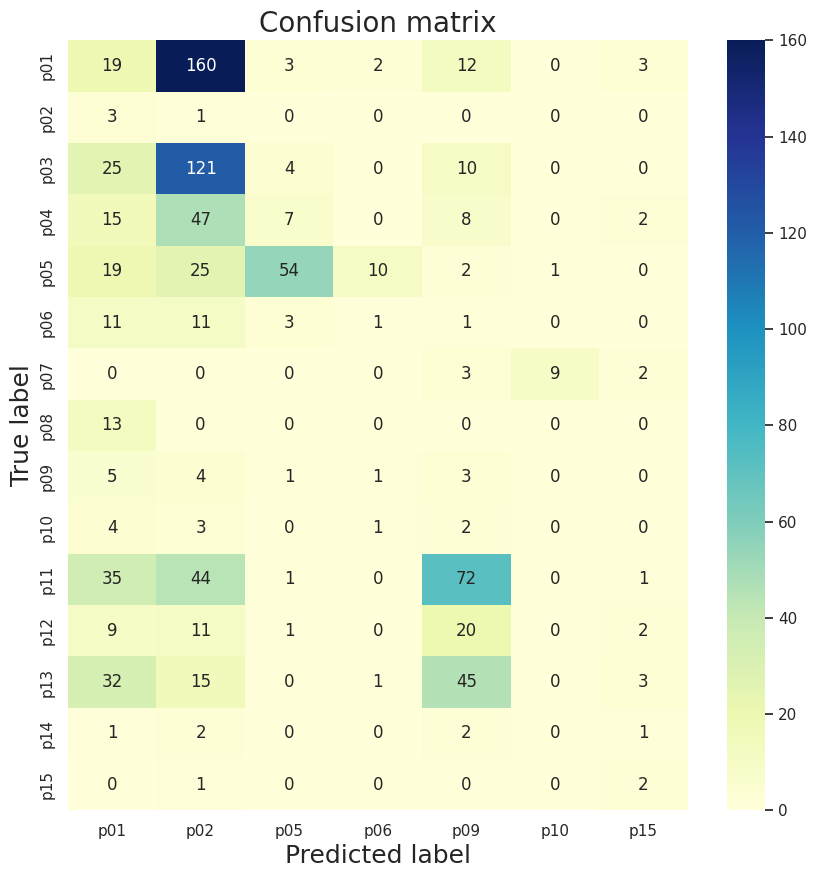

In [18]:
#create CF
data = {'Actual': act,'Predicted' : pred}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)